<a href="https://colab.research.google.com/github/eshita-3104/DSDBAL/blob/main/pract5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def RemoveOutliers(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high = Q3 + 1.5*IQR
  low = Q1 - 1.5*IQR
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  count = df[(df[var] > high) | (df[var] < low)][var].count()
  print('Total outliers in:',var,':',count)
  df = df[((df[var] >= low) & (df[var] <= high))]
  return df

In [56]:
def BuildModel(X,Y):
  # Training and testing data
  from sklearn.model_selection import train_test_split
  # Assign test data size 20%
  xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=13)
  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(solver = 'lbfgs')
  model = model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)

  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(ytest, ypred)
  sns.heatmap(cm, annot=True)
  plt.show()
  from sklearn.metrics import classification_report
  print(classification_report(ytest, ypred))

In [57]:
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [59]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [60]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [61]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [62]:
df=df.drop('User ID', axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [63]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [64]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


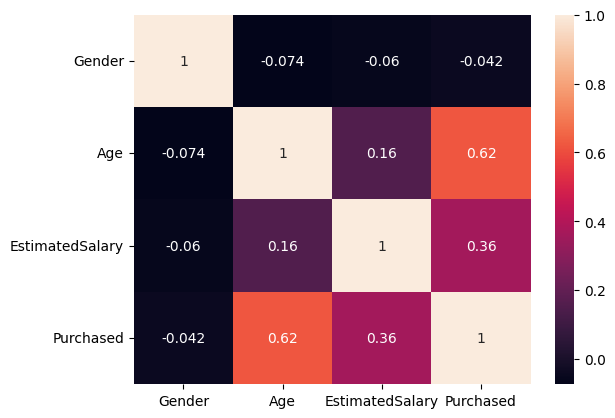

In [65]:
sns.heatmap(df.corr(),annot=True)
plt.show()


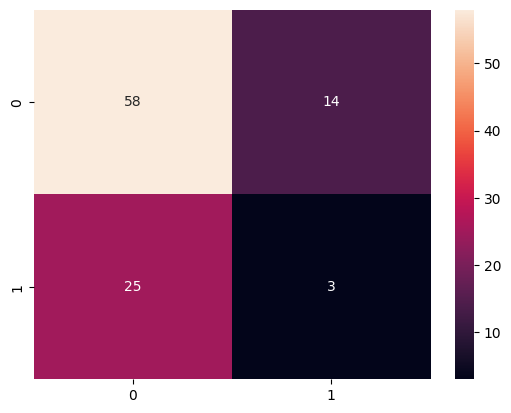

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        72
           1       0.18      0.11      0.13        28

    accuracy                           0.61       100
   macro avg       0.44      0.46      0.44       100
weighted avg       0.55      0.61      0.58       100



In [66]:
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']
BuildModel(X, Y)

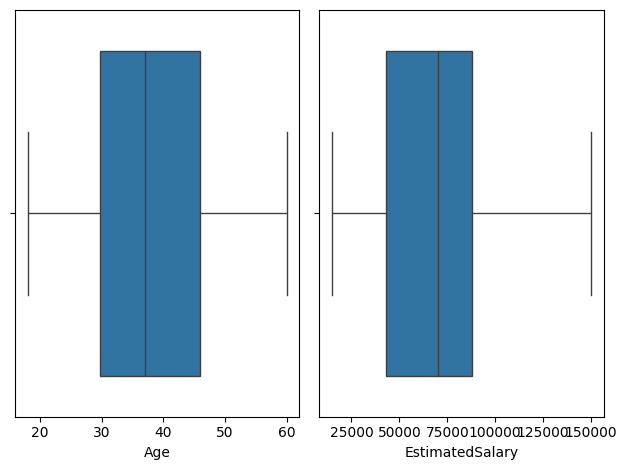

Highest allowed in variable: Age 70.375
lowest allowed in variable: Age 5.375
Total outliers in: Age : 0
Highest allowed in variable: EstimatedSalary 155500.0
lowest allowed in variable: EstimatedSalary -24500.0
Total outliers in: EstimatedSalary : 0


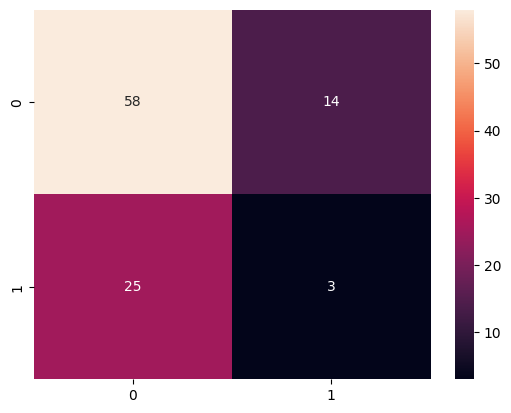

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        72
           1       0.18      0.11      0.13        28

    accuracy                           0.61       100
   macro avg       0.44      0.46      0.44       100
weighted avg       0.55      0.61      0.58       100



In [68]:
# Checking model score after removing outliers
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='Age', ax=axes[0])
sns.boxplot(data = df, x ='EstimatedSalary', ax=axes[1])
fig.tight_layout()
plt.show()

df = RemoveOutliers(df, 'Age')
df = RemoveOutliers(df, 'EstimatedSalary')

X = df[['Age','EstimatedSalary']]
Y = df['Purchased']
BuildModel(X, Y)
